In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [231]:
data=pd.read_excel("data/task1-dataset-1723704917.xlsx")

In [232]:
data

,order_id,order_time,order_city,order_area,order_kitchen,order_restaurant_id,order_size_TRY,preffered_payment_method,isSeamless,isnotSeamless,contact_reason_CSRLevel3,contact_reason_MainGroup,isContact,isSelfService,ContactCSAT,SelfServiceCSAT,NPS-Q-Score,NPS-Group
0,9450303,2024-07-26 01:26:02,İstanbul,Sancaktepe,Kahvaltı,723542,103,Online Payment,1,0,-,-,0,0,0,0,8,Passive
1,3091190,2024-02-24 13:44:21,İstanbul,Şile,Pizza,207622,80,Cash,1,0,-,-,0,0,0,0,4,Detractor
2,8040029,2024-01-06 19:26:41,İstanbul,Beykoz,Pide,35740,168,Cash,1,0,-,-,0,0,0,0,10,Promoter
3,9828010,2024-08-23 16:32:36,İstanbul,Bakırköy,Burger,614173,104,Credit/Debit Card,1,0,-,-,0,0,0,0,8,Passive
4,7887475,2024-07-19 09:23:03,İstanbul,Büyükçekmece,Burger,818521,415,Online Payment,1,0,-,-,0,0,0,0,10,Promoter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6823941,2024-03-21 14:58:48,İstanbul,Ataşehir,Pide,529907,209,Credit/Debit Card,1,0,-,-,0,0,0,0,5,Detractor
49996,1208839,2024-02-11 09:57:30,İstanbul,Kartal,Çiğköfte,271839,80,Online Payment,1,0,-,-,0,0,0,0,8,Passive
49997,1657925,2024-05-17 13:52:45,İstanbul,Ümraniye,Burger,869624,122,Online Payment,1,0,-,-,0,0,0,0,8,Passive
49998,6576510,2024-02-15 12:52:51,İstanbul,Üsküdar,Burger,537218,488,Meal Card,1,0,-,-,0,0,0,0,10,Promoter


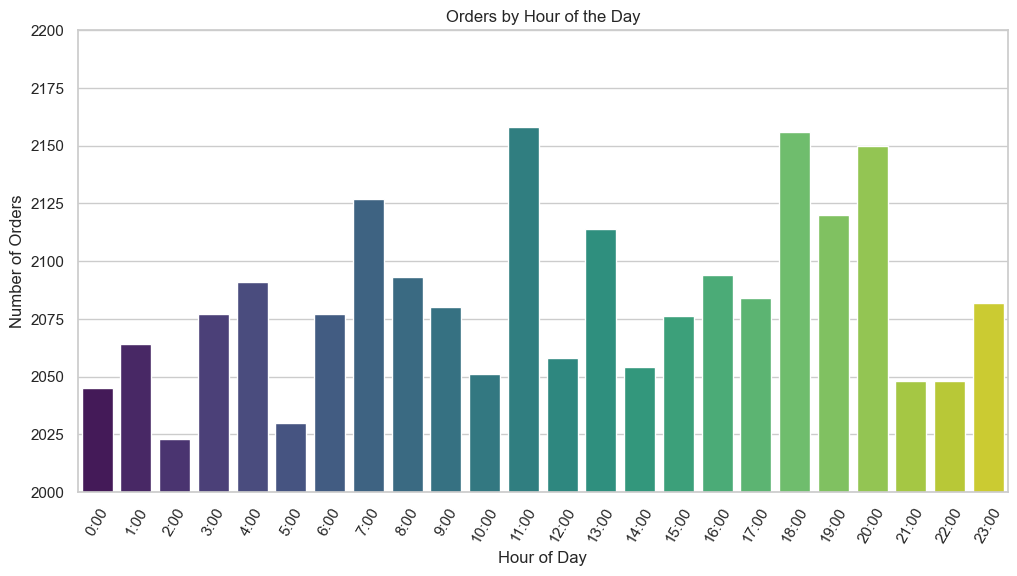

In [233]:
data['order_time'] = pd.to_datetime(data['order_time'])
data['hour'] = data['order_time'].dt.hour
hourly_orders = data['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette="viridis")
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(ticks=hourly_orders.index, labels=[f'{i}:00' for i in hourly_orders.index], rotation=60)
plt.ylim((2000, 2200))
plt.show()

In [234]:
# Function to categorize NPS scores
def categorize_nps(score):
    if score >= 9:
        return 'Promoter'
    elif 7 <= score <= 8:
        return 'Passive'
    elif score <= 6:
        return 'Detractor'

# Apply the function to categorize NPS scores
data['NPS_Category'] = data['NPS-Q-Score'].apply(categorize_nps)

# Calculate the number of promoters, passives, and detractors
nps_summary = data['NPS_Category'].value_counts()

promoters = nps_summary.get('Promoter', 0)
detractors = nps_summary.get('Detractor', 0)
total_respondents = nps_summary.sum()

# Calculate NPS
nps_score = ((promoters - detractors) / total_respondents)

# Output the NPS score
print(f"NPS Score: {nps_score}")
print(f"NPS Rate: {nps_score*100:.2f}")


# Additional analysis - print out the summary
print("\nNPS Summary:")
print(nps_summary)

NPS Score: 0.20746
NPS Rate: 20.75

NPS Summary:
NPS_Category
Promoter     22565
Passive      15243
Detractor    12192
Name: count, dtype: int64


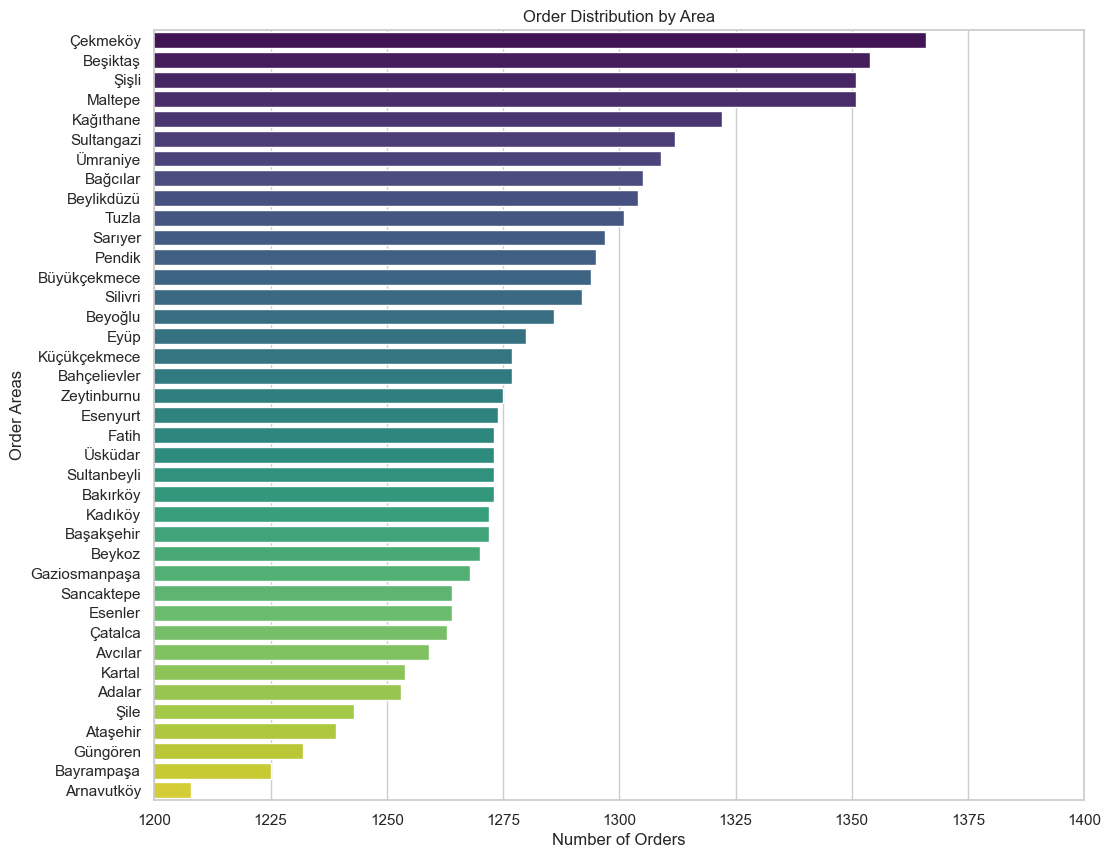

In [235]:
order_areas = data['order_area'].value_counts()
plt.figure(figsize=(12, 10))
sns.barplot(y=order_areas.index, x=order_areas.values, palette="viridis")
plt.title('Order Distribution by Area')
plt.xlabel('Number of Orders')
plt.ylabel('Order Areas')
plt.xlim((1200, 1400))
plt.show()

In [236]:
seamless_order_rate = data['isSeamless'].mean() * 100

print(f'Seamless Order Rate: {seamless_order_rate:.2f}%')

Seamless Order Rate: 74.62%


In [237]:
non_seamless_orders = data[data['isnotSeamless'] == 1]

# Calculate Contact Rate and Self-Service Rate
total_non_seamless_orders = len(non_seamless_orders)
contact_orders = non_seamless_orders[non_seamless_orders['isContact'] == 1]
self_service_orders = non_seamless_orders[non_seamless_orders['isSelfService'] == 1]

contact_rate = len(contact_orders) / total_non_seamless_orders
self_service_rate = len(self_service_orders) / total_non_seamless_orders

contact_rate_total = data['isContact'].mean() * 100
self_service_rate_total = data['isSelfService'].mean() * 100

print(f'Contact Rate for total: {contact_rate_total:.2f}%')
print(f'Self-Service Rate for total: {self_service_rate_total:.2f}%')
print(f"Contact Rate for non-seamless orders: {contact_rate:.2%}")
print(f"Self-Service Rate for non-seamless orders: {self_service_rate:.2%}")

Contact Rate for total: 5.01%
Self-Service Rate for total: 20.37%
Contact Rate for non-seamless orders: 19.74%
Self-Service Rate for non-seamless orders: 80.26%


In [238]:
average_contact_csat = data[data['isContact'] == 1]['ContactCSAT'].mean()
average_self_service_csat = data[data['isSelfService'] == 1]['SelfServiceCSAT'].mean()
average_nps = data['NPS-Q-Score'].mean()

print(f'Average Contact CSAT: {average_contact_csat:.2f}')
print(f'Average Self-Service CSAT: {average_self_service_csat:.2f}')
print(f'Average NPS: {average_nps:.2f}')

Average Contact CSAT: 2.73
Average Self-Service CSAT: 2.78
Average NPS: 7.92


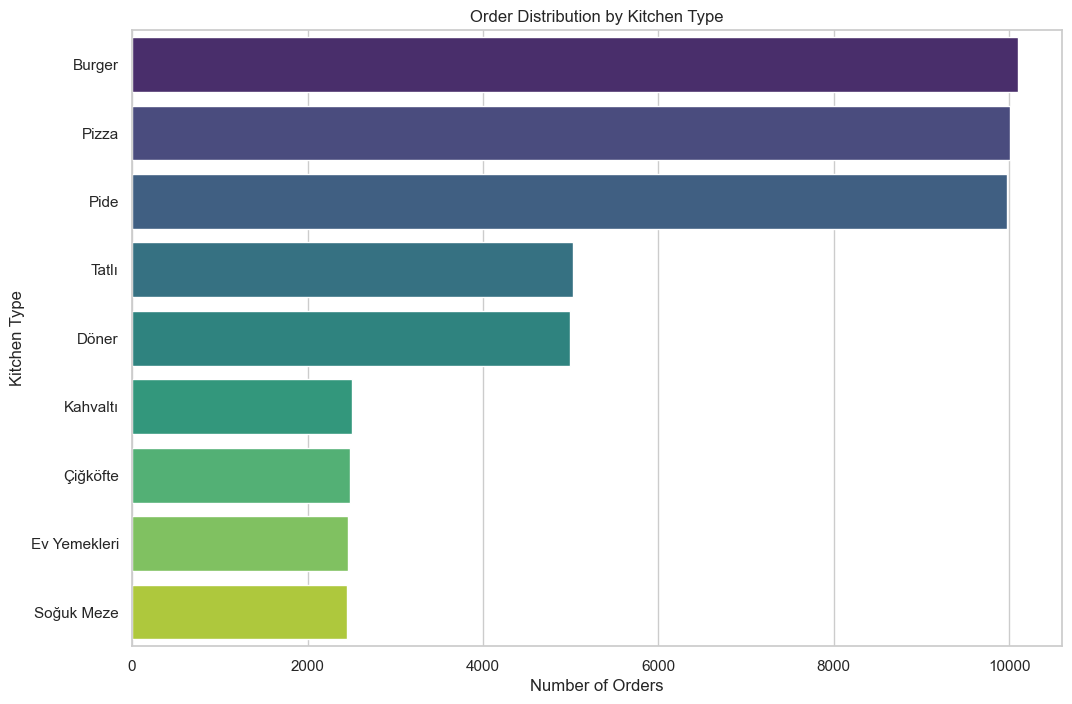

In [239]:
kitchen_orders = data['order_kitchen'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=kitchen_orders.index, x=kitchen_orders.values, palette="viridis")
plt.title('Order Distribution by Kitchen Type')
plt.xlabel('Number of Orders')
plt.ylabel('Kitchen Type')
plt.show()

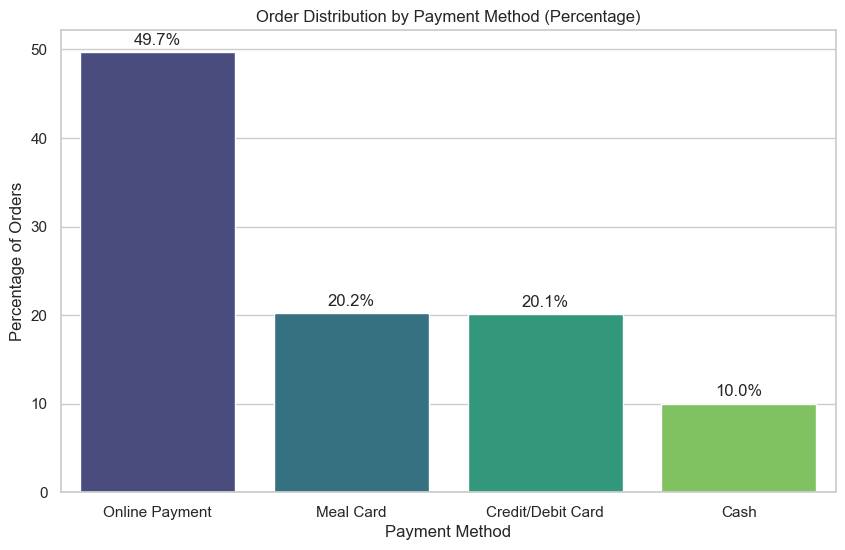

In [240]:
payment_method_distribution = data['preffered_payment_method'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_method_distribution.index, y=payment_method_distribution.values, palette="viridis")
plt.title('Order Distribution by Payment Method (Percentage)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage of Orders')

for i, value in enumerate(payment_method_distribution.values):
    ax.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

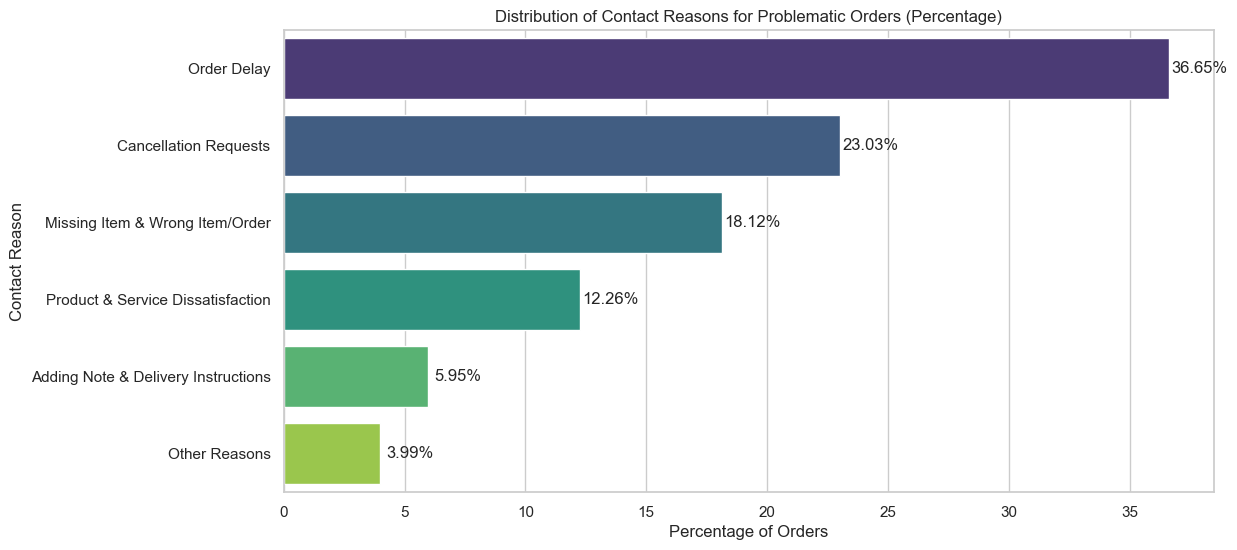

In [241]:
problematic_orders = data[(data['isSeamless'] == 0) & (data['isContact'] == 1)]
problematic_contact_reasons = problematic_orders['contact_reason_MainGroup'].value_counts()

total_orders = problematic_orders.shape[0]
problematic_contact_reasons_percentage = (problematic_contact_reasons / total_orders) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(y=problematic_contact_reasons_percentage.index, x=problematic_contact_reasons_percentage.values, palette="viridis")
plt.title('Distribution of Contact Reasons for Problematic Orders (Percentage)')
plt.xlabel('Percentage of Orders')
plt.ylabel('Contact Reason')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1.25, p.get_y() + p.get_height()/2, f'{width:.2f}%', ha='center', va='center')

plt.show()

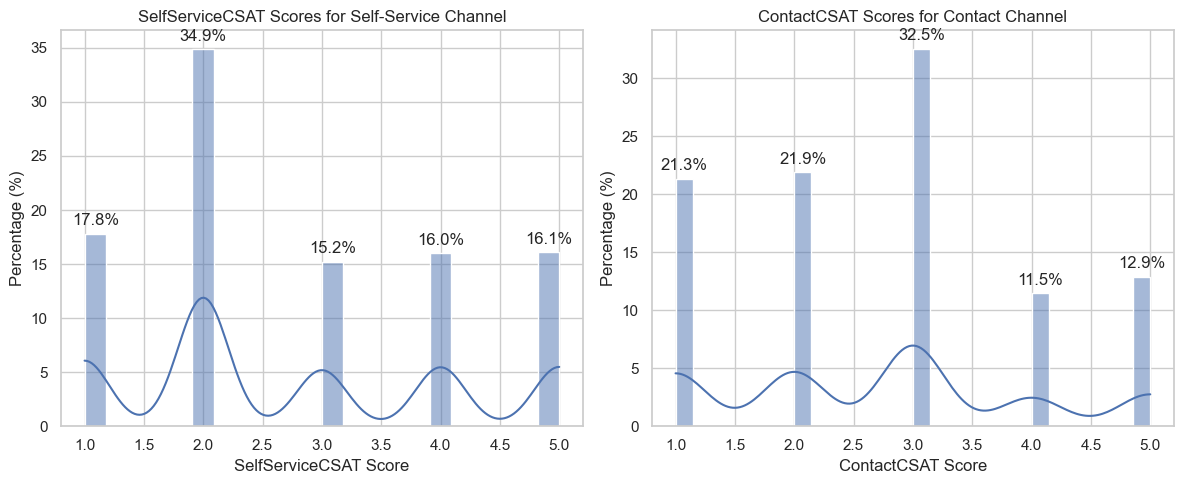

In [242]:
# Create a figure with 2 subplots arranged side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

self_service_data = data[data['isSelfService'] == 1]
hist_self = sns.histplot(self_service_data['SelfServiceCSAT'], kde=True, stat='percent', ax=axes[0])
axes[0].set_title('SelfServiceCSAT Scores for Self-Service Channel')
axes[0].set_xlabel('SelfServiceCSAT Score')
axes[0].set_ylabel('Percentage (%)')

for patch in hist_self.patches:
    height = patch.get_height()
    if height > 0:
        axes[0].text(patch.get_x() + patch.get_width() / 2, height + 0.5, f'{height:.1f}%', 
                     ha='center', va='bottom')

contact_service_data = data[data['isContact'] == 1]
hist_contact = sns.histplot(contact_service_data['ContactCSAT'], kde=True, stat='percent', ax=axes[1])
axes[1].set_title('ContactCSAT Scores for Contact Channel')
axes[1].set_xlabel('ContactCSAT Score')
axes[1].set_ylabel('Percentage (%)')

for patch in hist_contact.patches:
    height = patch.get_height()
    if height > 0:
        axes[1].text(patch.get_x() + patch.get_width() / 2, height + 0.5, f'{height:.1f}%', 
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

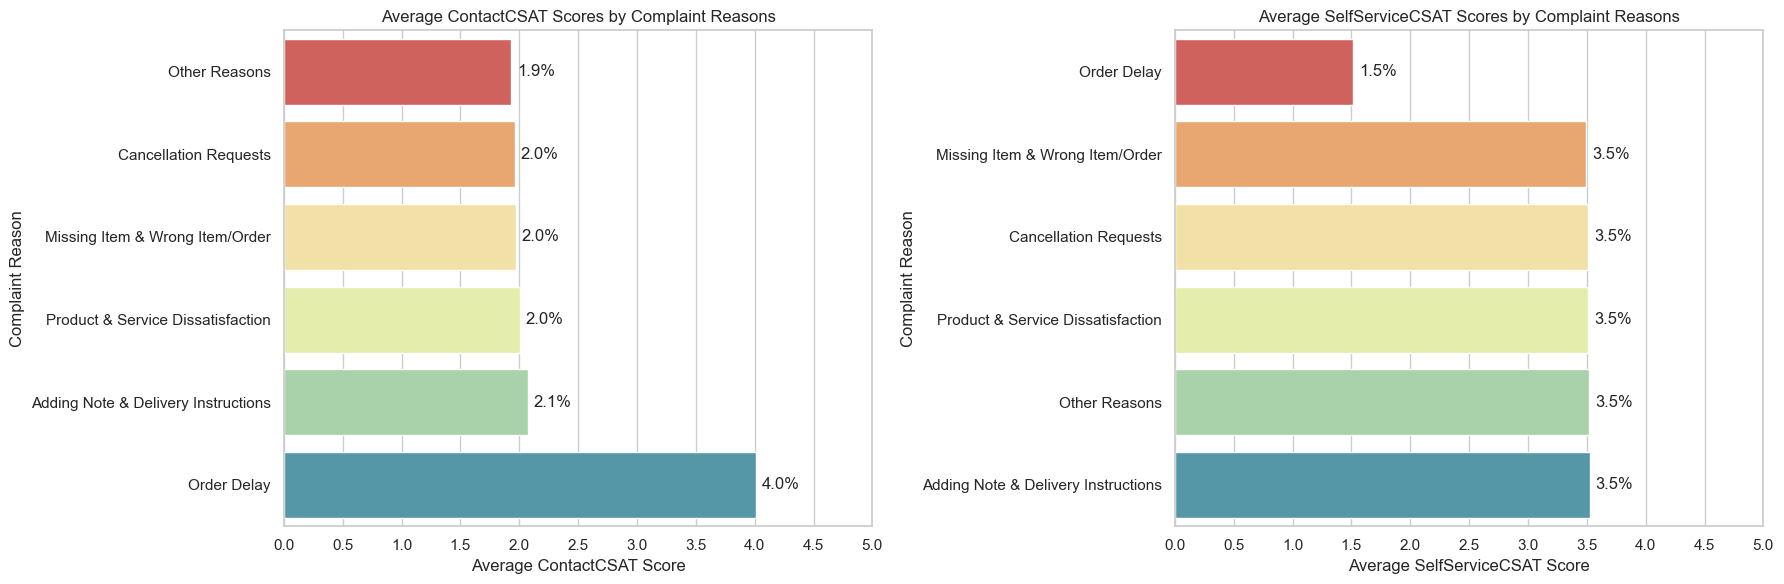

In [243]:
# Create a figure with 2 subplots arranged side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

contact_csat_by_reason = contact_service_data.groupby('contact_reason_MainGroup')['ContactCSAT'].mean().sort_values()
hist_contact=sns.barplot(x=contact_csat_by_reason.values, y=contact_csat_by_reason.index, palette='Spectral', ax=axes[0])
axes[0].set_title('Average ContactCSAT Scores by Complaint Reasons')
axes[0].set_xlabel('Average ContactCSAT Score')
axes[0].set_ylabel('Complaint Reason')
axes[0].set_xlim(0, 5)
axes[0].set_xticks(np.arange(0, 5.5, 0.5))  

for patch in hist_contact.patches:
    width = patch.get_width()
    if width > 0:  
        axes[0].text(width + 0.05, patch.get_y() + patch.get_height() / 2, f'{width:.1f}', 
                     ha='left', va='center')



self_service_csat_by_reason = self_service_data.groupby('contact_reason_MainGroup')['SelfServiceCSAT'].mean().sort_values()
hist_self_service = sns.barplot(x=self_service_csat_by_reason.values, y=self_service_csat_by_reason.index, palette='Spectral', ax=axes[1])
axes[1].set_title('Average SelfServiceCSAT Scores by Complaint Reasons')
axes[1].set_xlabel('Average SelfServiceCSAT Score')
axes[1].set_ylabel('Complaint Reason')
axes[1].set_xlim(0, 5)
axes[1].set_xticks(np.arange(0, 5.5, 0.5)) 

for patch in hist_self_service.patches:
    width = patch.get_width()
    if width > 0: 
        axes[1].text(width + 0.05, patch.get_y() + patch.get_height() / 2, f'{width:.1f}', 
                     ha='left', va='center')

plt.tight_layout()
plt.show()

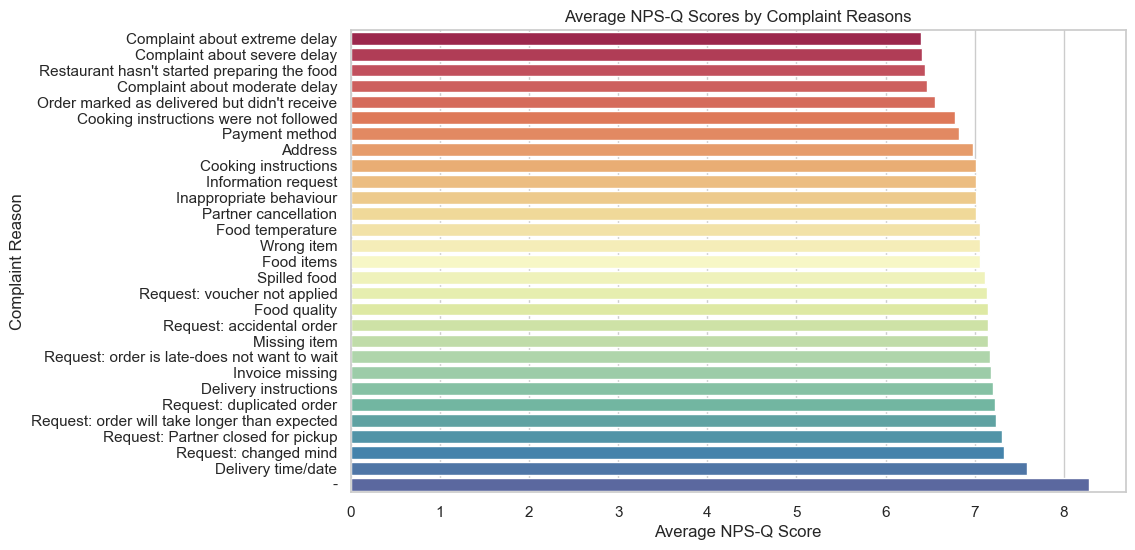

In [244]:
nsp_by_reason_detail = data.groupby('contact_reason_CSRLevel3')['NPS-Q-Score'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=nsp_by_reason_detail.values, y=nsp_by_reason_detail.index, palette='Spectral')
plt.title('Average NPS-Q Scores by Complaint Reasons')
plt.xlabel('Average NPS-Q Score')
plt.ylabel('Complaint Reason')
plt.show()

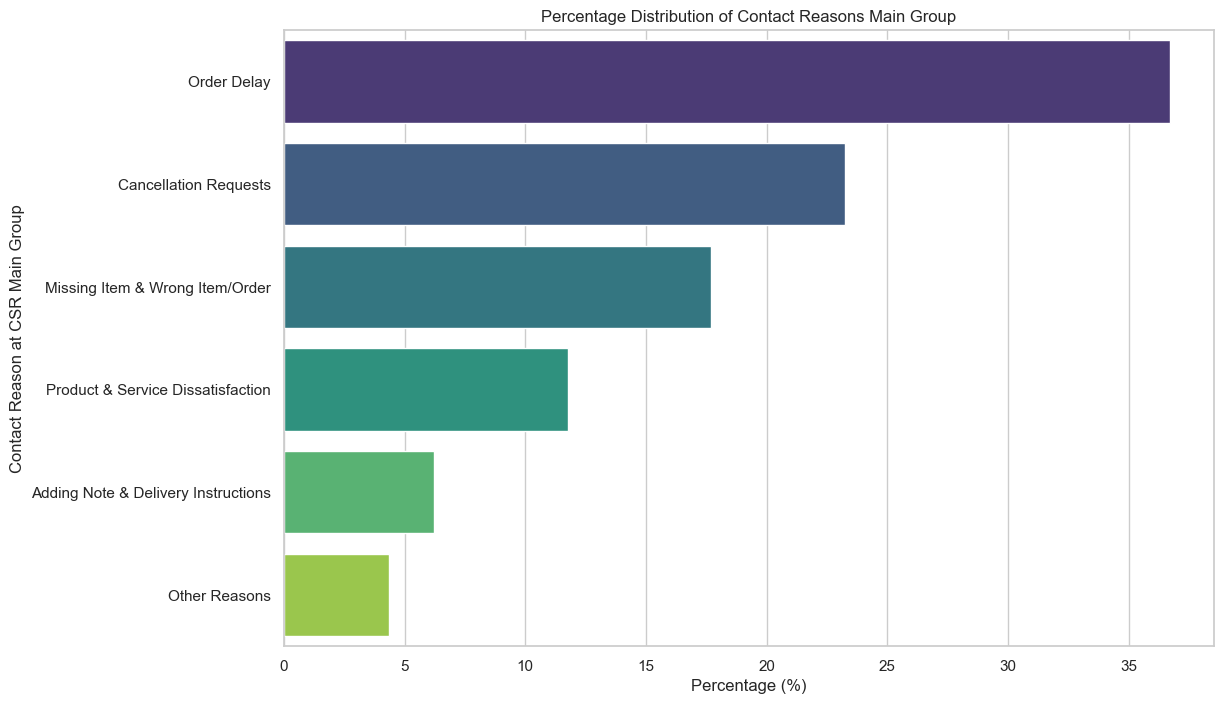

In [245]:
reason_counts = non_seamless_orders['contact_reason_MainGroup'].value_counts()
reason_percentage = (reason_counts / reason_counts.sum()) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=reason_percentage.values, y=reason_percentage.index, palette='viridis')
plt.title('Percentage Distribution of Contact Reasons Main Group')
plt.xlabel('Percentage (%)')
plt.ylabel('Contact Reason at CSR Main Group')
plt.show()

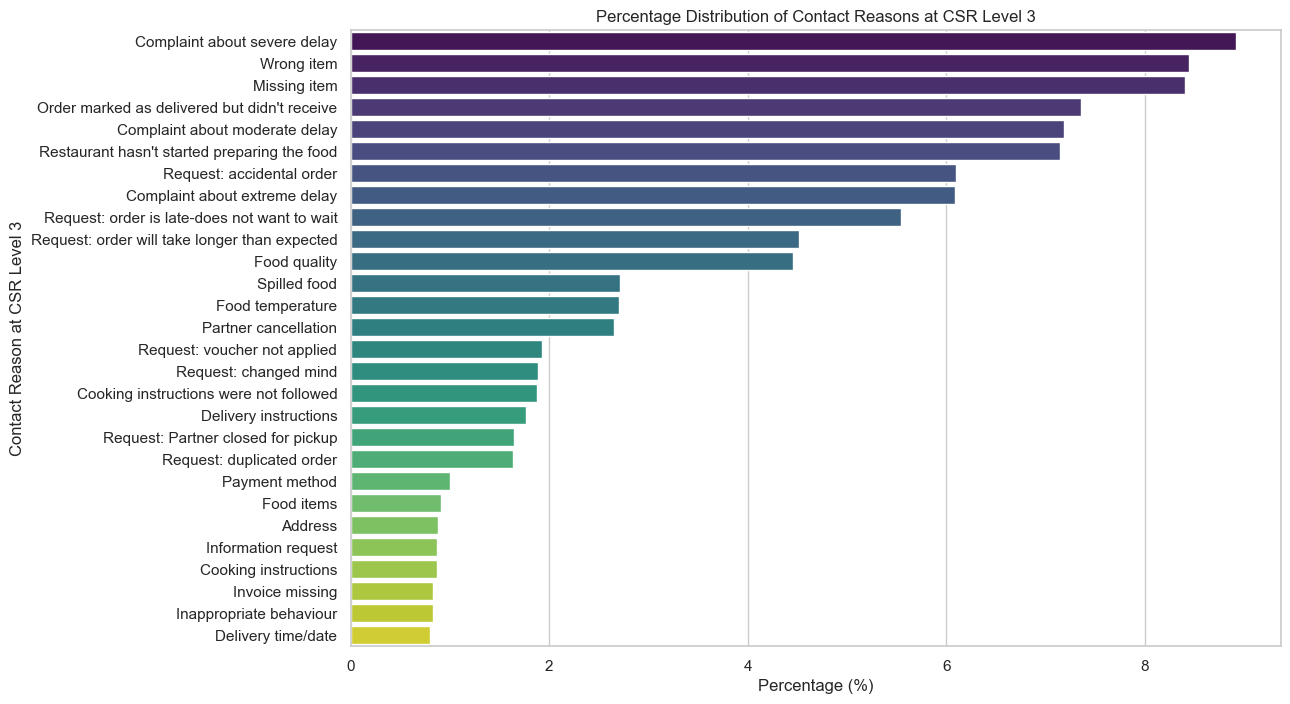

In [246]:
reason_counts = non_seamless_orders['contact_reason_CSRLevel3'].value_counts()
reason_percentage = (reason_counts / reason_counts.sum()) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=reason_percentage.values, y=reason_percentage.index, palette='viridis')
plt.title('Percentage Distribution of Contact Reasons at CSR Level 3')
plt.xlabel('Percentage (%)')
plt.ylabel('Contact Reason at CSR Level 3')
plt.show()

<Figure size 1200x500 with 0 Axes>

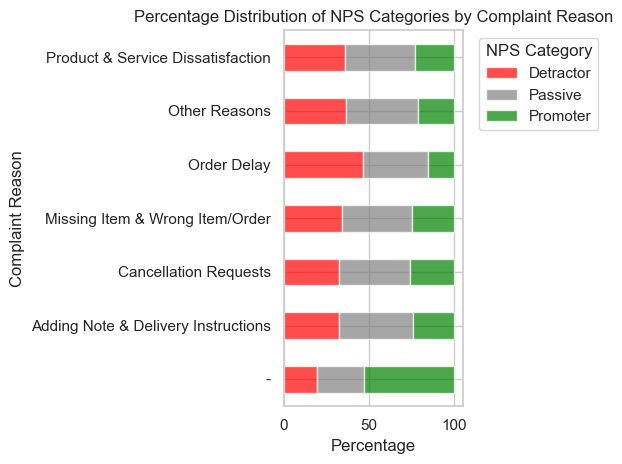

In [247]:
# Categorize NPS responses
def nps_category(score):
    if score >= 9:
        return 'Promoter'
    elif 7 <= score <= 8:
        return 'Passive'
    elif score <= 6:
        return 'Detractor'

data['NPS_Category'] = data['NPS-Q-Score'].apply(nps_category)

# Group data by complaint reason and calculate percentage for each NPS category
nps_distribution = data.groupby(['contact_reason_MainGroup', 'NPS_Category']).size().unstack(fill_value=0)
nps_percentage = nps_distribution.div(nps_distribution.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(12, 5))
nps_percentage.plot(kind='barh', stacked=True, color=['red', 'gray', 'green'], alpha=0.7)
plt.title('Percentage Distribution of NPS Categories by Complaint Reason')
plt.xlabel('Percentage')
plt.ylabel('Complaint Reason')
plt.legend(title='NPS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()